<a href="https://colab.research.google.com/github/jcandane/PhysicsI_Labs/blob/main/phy132_lab2forreal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm

def point_chargeE(qa, x, X, Y):
    x = -x
    return np.asarray([qa *(X+x[0])/( (X+x[0])**2 + (Y+x[1])**2 ), qa * (Y+x[1])/( (X+x[0])**2 + (Y+x[1])**2 )])


# Define Playground

Let's define the domain of the vector field

In [2]:
# 1D arrays
dx = 0.1 
x  = np.arange(-5,5,dx) ## cm
y  = np.arange(-5,5,dx)

# Meshgrid
X,Y = np.meshgrid(x,y) ## make field domain

In [3]:
X[24,35],Y[24,35]

(-1.5000000000000124, -2.6000000000000085)

# $k = \frac{1}{4\pi \varepsilon_0}$, $\varepsilon_0 = 1 ⇒ k = \frac{1}{4\pi}$

# !! make def (point_chargeE) above work for $k\ne 1$

# !! make def (point_chargeE) above work for 3D

generic 3D plot

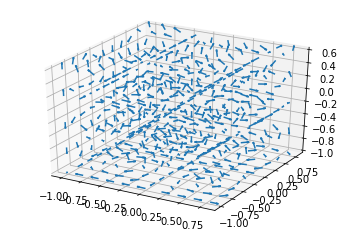

In [4]:
## the def. takes domain (X,Y,Z), charge Q, particle-coordinates R -> E

# Make the grid/"domain"
x, y, z = np.meshgrid(np.arange(-1, 1, 0.2),
                      np.arange(-1, 1, 0.2),
                      np.arange(-1, 1, 0.4))

ax = plt.figure().add_subplot(projection='3d')

# Make the direction data for the arrows/"making up the field"
ExXYZ = np.sin(np.pi * x) * np.cos(np.pi * y) * np.cos(np.pi * z)
EyXYZ = -np.cos(np.pi * x) * np.sin(np.pi * y) * np.cos(np.pi * z)
EzXYZ = (np.sqrt(2.0 / 3.0) * np.cos(np.pi * x) * np.cos(np.pi * y) *
     np.sin(np.pi * z))

ax.quiver(x, y, z, ExXYZ, EyXYZ, EzXYZ, length=0.1, normalize=True)

plt.show()

In [5]:
x.shape

(10, 10, 5)

In [6]:
z[9, 9]

array([-1. , -0.6, -0.2,  0.2,  0.6])

In [7]:
np.zeros((20,3)).shape

(20, 3)

# 1. 1 Charge

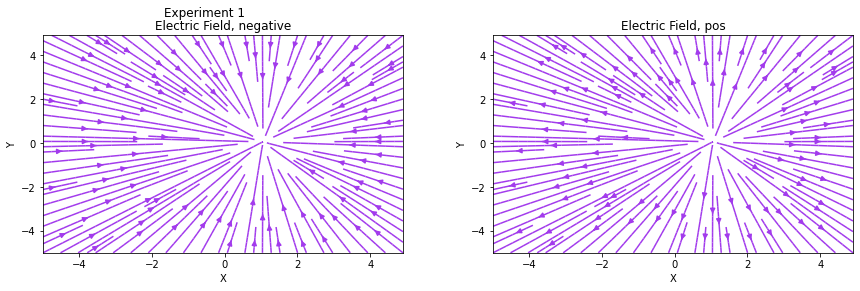

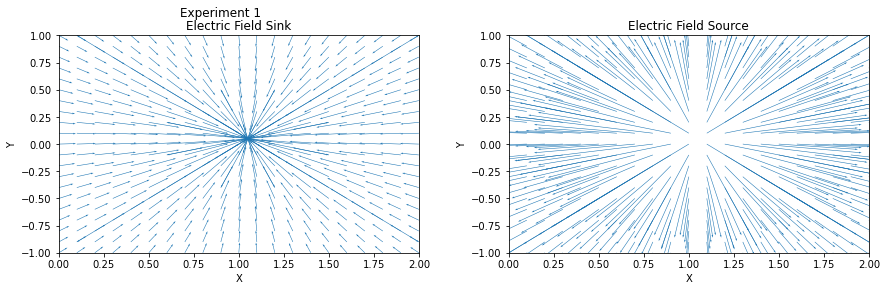

In [8]:
# Assign vector directions
x1 = np.array([1.+dx/2, 0+dx/2])
qa = 1
qb = -1

Exy = point_chargeE(-1., x1, X, Y) #+ point_charge(-1., -1, X, Y)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("Experiment 1")
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.streamplot(X,Y,Exy[0],Exy[1], density=1.4, linewidth=None, color='#A23BEC')
ax1.set_title("Electric Field, negative")
ax1.set(xlabel="X", ylabel="Y")

Exy = point_chargeE(2., x1, X, Y) 

ax2.streamplot(X,Y,Exy[0],Exy[1], density=1.4, linewidth=None, color='#A23BEC')
ax2.set(xlabel="X", ylabel="Y")
ax2.set_title("Electric Field, pos")
fig.show()

Exy = point_chargeE(-1., x1, X, Y) 

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("Experiment 1")
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.quiver(X,Y,Exy[0],Exy[1], color="C0", angles='xy', scale_units='xy', scale=10, width=.0015)
ax1.set_title("Electric Field Sink")
ax1.set(xlabel="X", ylabel="Y")
ax1.set_xlim([0,2])
ax1.set_ylim([-1,1])

Exy = point_chargeE(2., x1, X, Y) 

ax2.quiver(X,Y,Exy[0],Exy[1], color="C0", angles='xy', scale_units='xy', scale=10, width=.0015)
ax2.set(xlabel="X", ylabel="Y")
ax2.set_title("Electric Field Source")
ax2.set_xlim([0,2])
ax2.set_ylim([-1,1])
fig.show()

# 2. 2 Charges

# 4. Physical Dipole vs ideal dipole

In [10]:
def point_chargeEX(qa, x, X, Y):
    x = -x
    return np.asarray([qa *(X+x[0])/( (X+x[0])**2 + (Y+x[1])**2 ), qa * (Y+x[1])/( (X+x[0])**2 + (Y+x[1])**2 + (Z+x[2])**2 )])


R_ix = np.array([[0,0], [3,0], [3,3], [0,3]])
Q    = np.array([1, -1, 1, -2])



# Review

In [14]:
def grad(s):
    gradient = np.empty([s.ndim] + list(s.shape), dtype=s.dtype)
    for i in range(s.ndim):
        gradient[i] = np.gradient(s, axis=i)
    return gradient

Suppose we had a field with domain $X, Y, Z$ with a point charge of charge $q$ with cooridnates $x,y,z$. Then:

$\mathcal{E}(E) \propto \frac{\hat{R}}{|R|} = \frac{\hat{R}}{|R|^2}$

$\mathcal{E}(R) = \frac{1}{4\pi ɛ_0} \frac{q}{(X-x)^2 + (Y-x)^2 + (Z-z)^2} \begin{pmatrix} X - x \\ Y - y \\ Z - z \end{pmatrix} = \frac{1}{4\pi ɛ_0} \frac{q}{|R|^2}\,R$.         Electric Field of Point Charge

$\phi(R) = \frac{1}{4\pi ɛ_0} \frac{q}{\sqrt{(X-x)^2 + (Y-x)^2 + (Z-z)^2}} = \frac{1}{4\pi ɛ_0} \frac{q}{|R|} $,      Electric Potential of Point Charge

and let $R = \begin{pmatrix} X - x \\ Y - y \\ Z - z \end{pmatrix}$

In [11]:
x3 = np.array([0.5,0.75,1.])

# Make the grid/"domain"
XYZ  = np.asarray( np.meshgrid(np.arange(0, 2, 0.2), np.arange(0, 2, 0.2), np.arange(0, 2, 0.4)) )

ExXYZ = (XYZ - x3[:,None, None, None]) / np.linalg.norm(XYZ, axis = 0)

print(XYZ.shape)
print(x3.shape)
print(np.linalg.norm(XYZ, axis = 0).shape)

(3, 10, 10, 5)
(3,)
(10, 10, 5)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


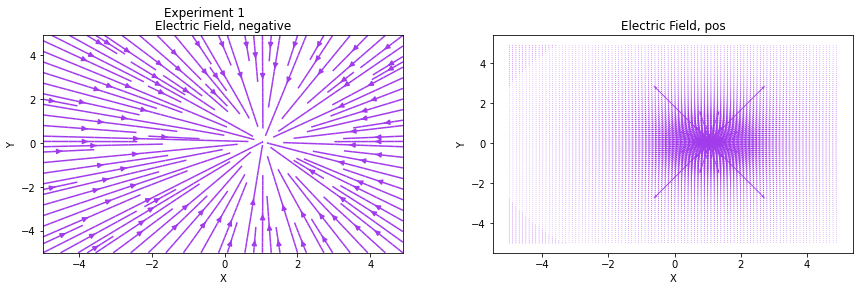

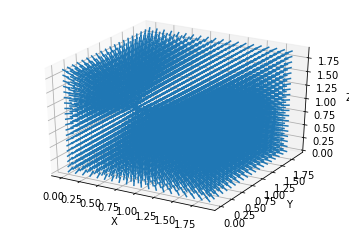

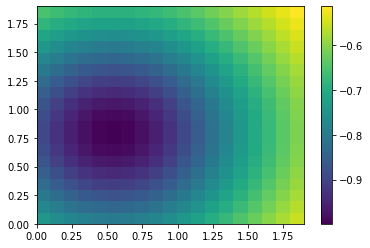

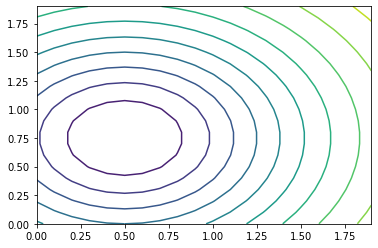

In [29]:
def Epoint(q, x, X, Y):
    x = -x
    return q * np.asarray([(X+x[0]), (Y+x[1])]) /( (X+x[0])**2 + (Y+x[1])**2 )

def Epoint3(q, x, X, Y, Z):
    return q * np.asarray([(X-x[0]), (Y-x[1]), (Z-x[2])]) /( (X-x[0])**2 + (Y-x[1])**2 + (Z-x[2])**2 )

def EEpoint3(q, x, X, Y, Z):
    XYZ = np.asarray([X,Y,Z])
    R = XYZ - x[:,None, None, None]
    return q*R / np.linalg.norm(R, axis = 0)

def EEpoint2(q, x, X, Y):
    XY = np.asarray([X,Y])
    R = XY - x[:,None, None]
    return q*(R) / np.linalg.norm(R, axis = 0)

def φpoint3(q, x, X, Y, Z):
    XYZ = np.asarray([X,Y,Z])
    R = XYZ - x[:,None, None, None]
    return q / np.linalg.norm(R, axis = 0)




# 1D arrays
dx = 0.1 
x  = np.arange(-5,5,dx) ## cm
y  = np.arange(-5,5,dx)

# Meshgrid
X,Y = np.meshgrid(x,y) ## make field domain

# Assign vector directions
x1 = np.array([1.+dx/2, 0+dx/2])
qa = 1
qb = -1

Exy = Epoint(-1., x1, X, Y) #+ point_charge(-1., -1, X, Y)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("Experiment 1")
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.streamplot(X,Y,Exy[0],Exy[1], density=1.4, linewidth=None, color='#A23BEC')
ax1.set_title("Electric Field, negative")
ax1.set(xlabel="X", ylabel="Y")

ax2.quiver(X,Y,Exy[0],Exy[1], linewidth=None, color='#A23BEC')
ax2.set(xlabel="X", ylabel="Y")
ax2.set_title("Electric Field, pos")
fig.show()


x3 = np.array([0.5,0.75,1.])

# Make the grid/"domain"
X, Y, Z = np.meshgrid(np.arange(0, 2, 0.1),
                      np.arange(0, 2, 0.1),
                      np.arange(0, 2, 0.1))

E_xXYZ = Epoint3(-1, x3, X, Y, Z)

ax = plt.figure().add_subplot(projection='3d')

ax.quiver(X, Y, Z, E_xXYZ[0], E_xXYZ[1], E_xXYZ[2], length=0.1, normalize=True)
ax.set(xlabel="X", ylabel="Y", zlabel="Z")
plt.show()


φ = φpoint3(-1, x3, X, Y, Z)

# Make the plot
s = 0
plt.pcolormesh(X[:, :, s], Y[:, :, s], φ[:, :, s], shading='auto')
plt.colorbar()
plt.show()

plt.contour(X[:, :, s], Y[:, :, s], φ[:, :, s], 10)
plt.show()

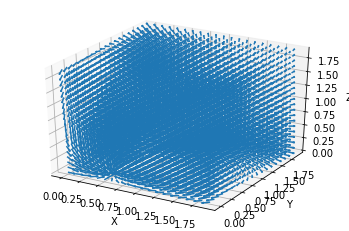

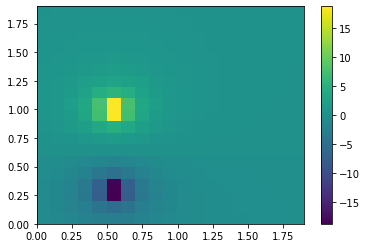

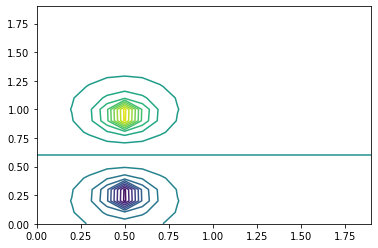

In [32]:
x3  = np.array([0.5,0.25,0.])
x3_ = np.array([0.5,0.95,0.])
q_  = +1.

# Make the grid/"domain"
X, Y, Z = np.meshgrid(np.arange(0, 2, 0.1),
                      np.arange(0, 2, 0.1),
                      np.arange(0, 2, 0.1))

E_xXYZ = Epoint3(-1, x3, X, Y, Z) + Epoint3(q_, x3_, X, Y, Z)

ax = plt.figure().add_subplot(projection='3d')

ax.quiver(X, Y, Z, E_xXYZ[0], E_xXYZ[1], E_xXYZ[2], length=0.1, normalize=True)
ax.set(xlabel="X", ylabel="Y", zlabel="Z")
plt.show()


φ  = φpoint3(-1, x3, X, Y, Z) + φpoint3(1, x3_, X, Y, Z)

# Make the plot
s = 0
plt.pcolormesh(X[:, :, s], Y[:, :, s], φ[:, :, s], shading='auto')
#plt.pcolormesh(X[:, :, s], Y[:, :, s], φ_[:, :, s], shading='auto')
plt.colorbar()
plt.show()

plt.contour(X[:, :, s], Y[:, :, s], φ[:, :, s], 20)
#plt.contour(X[:, :, s], Y[:, :, s], φ_[:, :, s], 10)
plt.show()

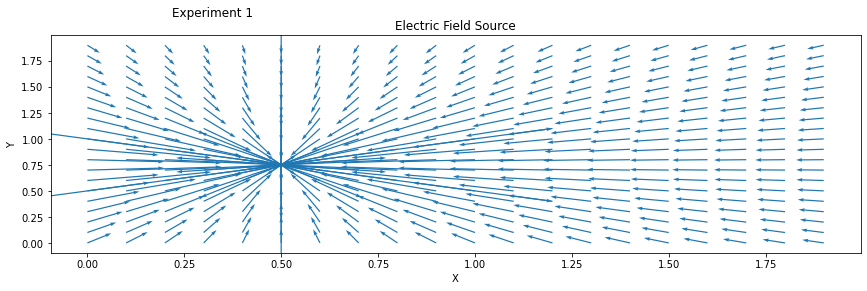

In [13]:
fig, (ax2) = plt.subplots(1, 1)
fig.suptitle("Experiment 1")
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

s = 10
ax2.quiver(X[:, :, s], Y[:, :, s], E_xXYZ[0, :, :, s], E_xXYZ[1,:, :, s], color="C0", angles='xy', scale_units='xy', scale=10, width=.0015)
ax2.set(xlabel="X", ylabel="Y")
ax2.set_title("Electric Field Source")
fig.show()

N point particles

In [36]:
def EEpoint3N(q, x, X, Y, Z):
    XYZ   = np.asarray([X,Y,Z])
    E_out = np.zeros(XYZ.shape)
    for i in range(len(q)):
        R = XYZ - x[i][:,None, None, None]
        E_out += q[i]*(R) / np.linalg.norm(R, axis = 0)
    return E_out

q_i  = np.array([1, -1])
R_ix = np.array([[0, 1.05, 0.], [0, -1.05, 0.]])

EEpoint3N(q_i, R_ix, X, Y, Z).shape

(3, 20, 20, 20)

# TO DO



1.   Determine the Point Charge potential $\phi(R)$ (a scalar field, a number at every point in space). 
2.   $\phi(R)$ can be plotted on a contour plot (**not** on vectored plots, stream nor quiver!)
3.   Then find its gradient: $-\text{grad}\left( \phi(R) \right) = \mathcal{E}(R)$, **verify** if this is equal to the electric field defined above (my gradient def. is in one of the notebooks I shared)








# !! TODO !! 

make & caption all graphs

1.   2D quiver plot **E field**  + single point particle
2.   2D contour plot **Potential**  + single point particle
3.   2D quiver plot **E field**  - single point particle
4.   2D contour plot **Potential**  - single point particle



5.   3D quiver plot sinlge **E field** dipole particle
6.   Obtain 3D **Potential** dipole particle (dont plot)
7.   take the negative of gradient potential show its equal to **E field** dipole particle
8.   Slice 3D potential, and plot contour

